In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.data_loader import load_data, compute_log_returns
from src.eda import plot_price, plot_returns
from src.change_point_model import build_model, sample_model
from src.diagnostics import summarize, plot_trace, plot_tau
from src.interpretation import summarize_impact



WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
d:\assesment\change_point_analysis\.venv\Lib\site-packages\arviz\__init__.py:50: FutureWarning: 
ArviZ is undergoing a major refactor to improve flexibility and extensibility while maintaining a user-friendly interface.
Some upcoming changes may be backward incompatible.
For details and migration guidance, visit: https://python.arviz.org/en/latest/user_guide/migration_guide.html
  warn(


d:\assesment\change_point_analysis\src\data_loader.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


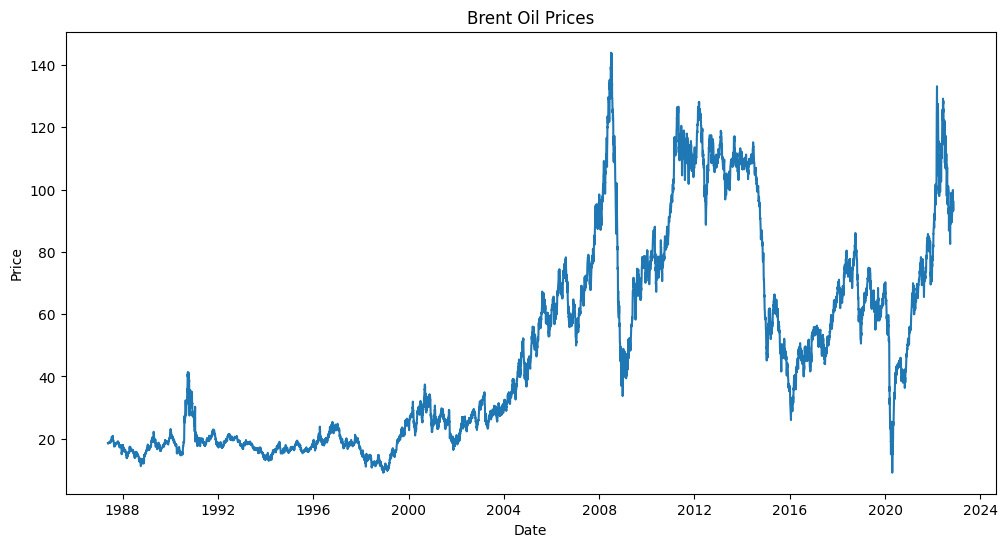

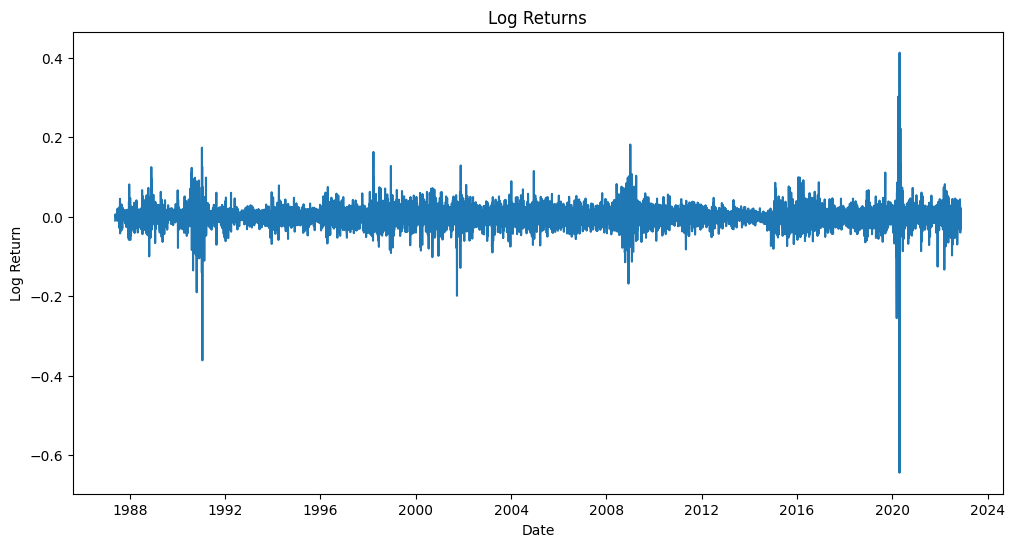

In [2]:
df = load_data("../data/raw/BrentOilPrices.csv")
plot_price(df)

df = compute_log_returns(df)
plot_returns(df)


In [ ]:
returns = df["log_return"].values

model = build_model(returns)
trace = sample_model(model)


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu1, mu2, sigma]


d:\assesment\change_point_analysis\.venv\Lib\site-packages\rich\live.py:260: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

In [ ]:
summarize(trace)
plot_trace(trace)
plot_tau(trace)


In [ ]:
summarize_impact(trace, df)
